# Some Unit tests for the HMM

In [1]:
import socket as socket
import os as os
import sys as sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())

sys.path.append("./python3/") 
from main import HMM_Full
from plot.plot_posterior import plot_posterior, plot_posterior_panel

compute-e-16-236.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK


# Test 1: HMM Likelihood on classic simulated example

In [2]:
def run_simulated_example():
    """The classic example"""
    h = HMM_Full(folder_in="./output/simulated/undermodel/sim2a/", l_model="simulated", t_model="standard", 
                     e_model="haploid_gl", h_model = "FiveStateFast", p_model="None",
                     output=True, load=True)
    h.t_obj.set_params(ibd_in = 0.0005, ibd_out = 0.001, ibd_jump = 0.05, max_gap=1.0)
    _, _, _, _, tot_ll = h.run_fwd_bwd()
    p=np.isclose(tot_ll, -26156.062, rtol=0, atol=0.01)
    return p

## The original run, don't touch [for museum reasons]

In [3]:
p = run_simulated_example()
assert(p)

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 9999.0000 Morgan
Gaps bigger than 0.1 cM: 9999
Maximum Gap: 100.0000 cM
Upper Gap Cutoff: 100.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 110.112768 mB
Total Log likelihood: -26156.062


## The run to play around with

In [3]:
def run_simulated_example_fast():
    """The classic example"""
    h = HMM_Full(folder_in="./output/simulated/undermodel/sim2a/", l_model="simulated", t_model="standard", 
                     e_model="haploid_gl", h_model = "FiveStateFast", p_model="None",
                     output=True, load=True)
    h.t_obj.set_params(ibd_in = 0.0005, ibd_out = 0.001, ibd_jump = 0.05, max_gap=1.0)
    post, r_vec = h.run_fwd_bwd(full=False)
    #p=np.isclose(tot_ll, -26156.062, rtol=0, atol=0.01)
    return post, r_vec

In [4]:
post, r_vec = run_simulated_example_fast()

Runtime Loading: 0.13510537147521973 s
Runtime E Mat.: 0.0019023418426513672 s
Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 9999.0000 Morgan
Gaps bigger than 0.1 cM: 9999
Maximum Gap: 100.0000 cM
Upper Gap Cutoff: 100.0000 cM
HMM State Number: 4
Runtime T Mat.: 0.010665655136108398 s
Memory Usage Full:
Memory Usage: 110.829568 mB
Total Log likelihood: -26156.062
Runtime HMM calc.: 0.021946430206298828 s
Runtime Postprocessing: 2.384185791015625e-06 s


In [11]:
def run_simulated_example_scaled():
    """The classic example"""
    h = HMM_Full(folder_in="./output/simulated/undermodel/sim2a/", l_model="simulated", t_model="standard", 
                     e_model="haploid_gl", h_model = "FiveStateScaled", p_model="None",
                     output=True, load=True)
    h.t_obj.set_params(ibd_in = 0.0005, ibd_out = 0.001, ibd_jump = 0.05, max_gap=1.0)
    post, r_vec = h.run_fwd_bwd(full=True)
    #p=np.isclose(tot_ll, -26156.062, rtol=0, atol=0.01)
    return post, r_vec

In [12]:
post1, r_vec1 = run_simulated_example_scaled()

Runtime Loading: 0.1321871280670166 s
Runtime E Mat.: 0.0025429725646972656 s
Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 9999.0000 Morgan
Gaps bigger than 0.1 cM: 9999
Maximum Gap: 100.0000 cM
Upper Gap Cutoff: 100.0000 cM
HMM State Number: 4
Runtime T Mat.: 0.010152101516723633 s
Memory Usage at end of HMM:
Memory Usage: 114.23744 mB
Total Log likelihood: -26156.056


ValueError: too many values to unpack (expected 2)

In [7]:
np.sum(post1, axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

In [8]:
np.sum(np.exp(post), axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

In [22]:
np.shape(post)

(5, 10000)

In [9]:
post1

array([[9.99996692e-01, 9.99993458e-01, 9.99991097e-01, ...,
        9.94457414e-01, 9.94024891e-01, 9.93581766e-01],
       [1.26213548e-06, 2.66475539e-06, 3.15595456e-06, ...,
        4.22653937e-04, 3.52591238e-04, 4.04487686e-04],
       [4.62641457e-07, 7.73821594e-07, 1.81992483e-06, ...,
        3.04790188e-03, 3.01907380e-03, 2.76516965e-03],
       [1.30472327e-06, 2.76548248e-06, 3.29906265e-06, ...,
        1.22236811e-03, 1.70378060e-03, 2.01355536e-03],
       [2.78233476e-07, 3.37666633e-07, 6.28277929e-07, ...,
        8.49662139e-04, 8.99663092e-04, 1.23502109e-03]])

In [27]:
np.exp(post)

array([[9.99996690e-01, 9.99993456e-01, 9.99991095e-01, ...,
        9.99980724e-01, 9.99989018e-01, 9.99999354e-01],
       [1.26213548e-06, 2.66475539e-06, 3.15595456e-06, ...,
        3.31376322e-06, 9.29556727e-07, 4.07263195e-08],
       [4.62641456e-07, 7.73821592e-07, 1.81992483e-06, ...,
        1.20891270e-05, 7.95935932e-06, 2.78414366e-07],
       [1.30472327e-06, 2.76548247e-06, 3.29906265e-06, ...,
        1.57116416e-06, 1.37006100e-06, 2.02737195e-07],
       [2.78233476e-07, 3.37666633e-07, 6.28277927e-07, ...,
        2.30144178e-06, 7.23446033e-07, 1.24349554e-07]])

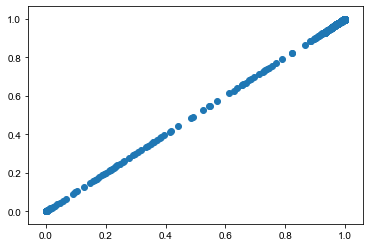

In [10]:
plt.figure()
ax = plt.gca()
ax.scatter(np.exp(post[0]), post1[0])
plt.show()